In [19]:
# spot check machine learning algorithms on the adult imbalanced dataset
from numpy import mean
from numpy import std
import pdb
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression



# load the dataset
def load_dataset(full_path):
    # load the dataset as a numpy array
    dataframe = read_csv(full_path, na_values='?')
    # drop rows with missing
    dataframe = dataframe.dropna()
    # split into inputs and outputs
    last_ix = 'income'
    print(last_ix)
    X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
    # select categorical and numerical features
    cat_ix = X.select_dtypes(include=['object', 'bool']).columns
    num_ix = X.select_dtypes(include=['int64', 'float64']).columns
    # label encode the target variable to have the classes 0 and 1
    return X.values, y, cat_ix, num_ix

# evaluate a model
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define models to test
def get_models():
    models, names = list(), list()
    # CART
#     models.append(DecisionTreeClassifier())
#     names.append('CART')
#     # SVM
#     models.append(SVC(gamma='scale'))
#     names.append('SVM')
#     # Bagging
#     models.append(BaggingClassifier(n_estimators=100))
#     names.append('BAG')
#     # RF
#     models.append(RandomForestClassifier(n_estimators=100))
#     names.append('RF')
#     # GBM
#     models.append(GradientBoostingClassifier(n_estimators=100))
#     names.append('GBM')
#     models.append(MLPClassifier(max_iter=300))
#     names.append('MLP')
    models.append(LogisticRegression(class_weight='balanced', solver='liblinear'))
    names.append('LR')
    return models, names


# file = 'train_sex'
# file = 'adult_sanitized_0.9875'
# # define the location of the dataset
# full_path = f'../focus_data/gansanitized/{file}.csv'
# # load the dataset
# X, y, cat_ix, num_ix = load_dataset(full_path)

original_data = f"../GeneralDatasets/Csv/Adult_NotNA_.csv"
# original_data = f"../focus_data/2_sex.csv"
X, y, cat_ix, num_ix = load_dataset(original_data)


# define models
models, names = get_models()
results = list()
# evaluate each model
for i in range(len(models)):
	# define steps
	steps = [('c',OneHotEncoder(handle_unknown='ignore'),cat_ix), ('n',MinMaxScaler(),num_ix)]
	# one hot encode categorical, normalize numerical
	ct = ColumnTransformer(steps)
	# wrap the model i a pipeline
	pipeline = Pipeline(steps=[('t',ct),('m',models[i])])
	# evaluate the model and store results
	scores = evaluate_model(X, y, pipeline)
	results.append(scores)
	# summarize performance
	print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))


# plot the results
# pyplot.boxplot(results, labels=names, showmeans=True)
# pyplot.savefig(f"./experiments/metadata_{file}.png")
# Write the results to file

income
>LR nan (nan)


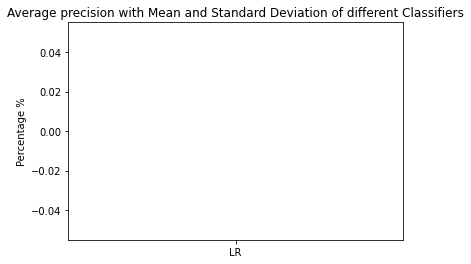

In [16]:
# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.title("Average precision with Mean and Standard Deviation of different Classifiers")
pyplot.ylabel("Percentage %")
pyplot.savefig('results_adult_ML.png')
pyplot.show()